    Get The Data

Download the Data

In [1]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):

    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    


In [2]:
fetch_housing_data()


In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Take a Quick Look at the Data Structure

In [4]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


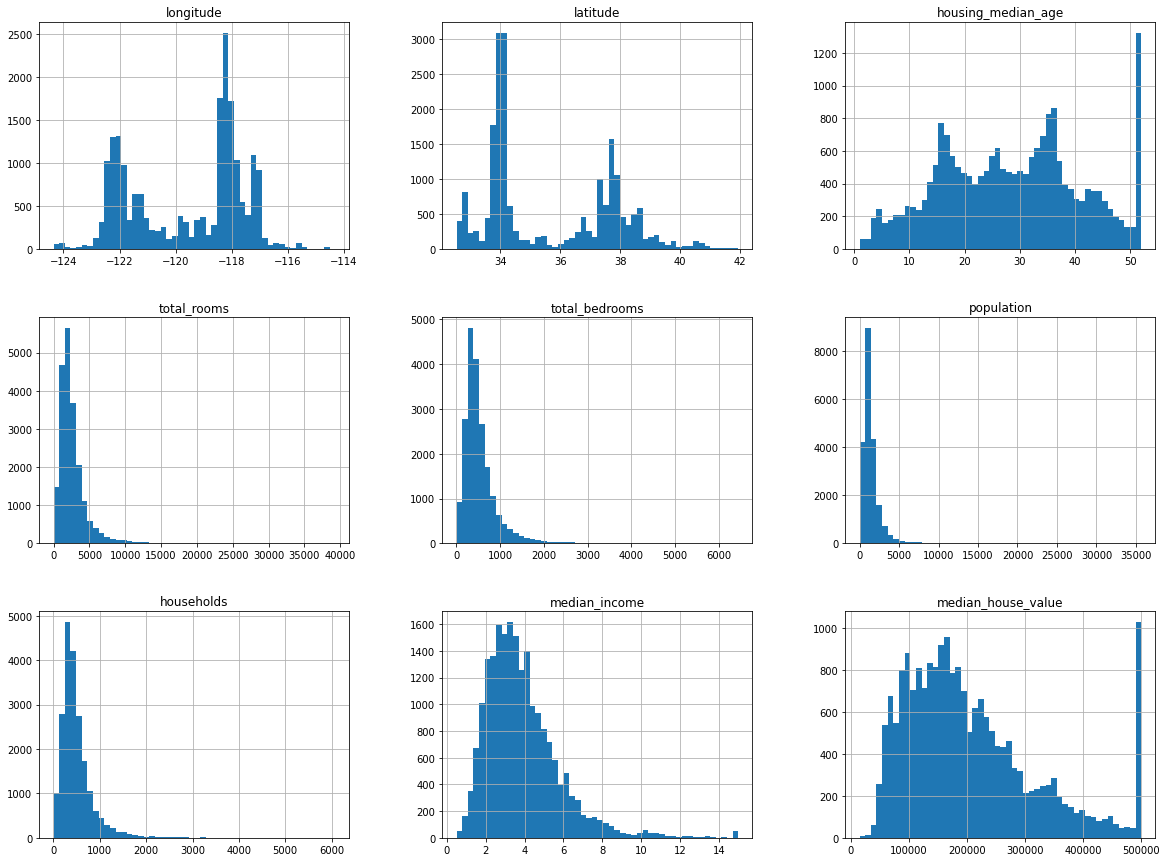

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Create a Test Set

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [10]:
from IPython.display import display
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

# artık her çalışmasında train_set ve test_set in değişmesi promlemini çözdük
# fakat data set e yeni bir değer eklendiğinde bu sorun tekrar oluşacaktır 
display(train_set.head())
display(test_set.head())


16512
4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

display(train_set.head())
display(test_set.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

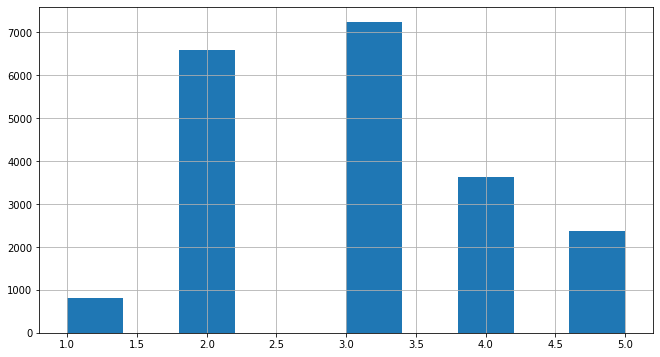

In [12]:
# ortalama gelir verisinin ev fiyat tahmininde çok önemli olduğu bilinmekte ve ortalama gelirin verilerinin train test set oluşturuken
# dengesiz dağıtılması sonuçu oluşabilecek bir önyargıdan kaçınılmak istenmektedir. Bunun için ortalama gelir verilerini kategorize edip dengeli bir şekilde dağıtmaya çalışacağız.

# ortalama gelir verisinin çoğunluğu 15000 ile 60000 arasındır bu yüzden verileri 
# [ 0-1.5 , 1.5-3.0 , 3.0-4.5 , 4.5-6 , 6 - Geri kalanlar ] olacak şekilde 5 kategoriye 
# pd.cut methodu ile ayırıyoruz ve bunu veri tablomuza "income_cat" olarak ekliyoruz
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist(figsize=(11,6))


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [27]:
test_index = split.split(housing, housing["income_cat"])

import numpy as np

#Döngü kullanmadan bu şekilde ağılıklı dağıltım yapabiliriz 
a=np.array(list(test_index),dtype=object)

train_index=a[0,1]
test_index=a[0,0]
strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]

display(strat_test_set)
display(strat_train_set)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [28]:
# "income_cat" kolonu ile işimiz bitti o kolonu kaldırıyoruz 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

    Discover and Visualize the Data to Gain
Insights

In [29]:
# Daha ayrıntılı bir bakış atabilekmek için train setimizin bir kopyasını alıyoruz 
housing = strat_train_set.copy()

Visualizing Geographical Data


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

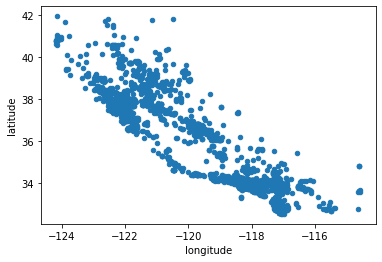

In [30]:
# Konum verilerimizin bir scatter grafiğini çiziyoruz 
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

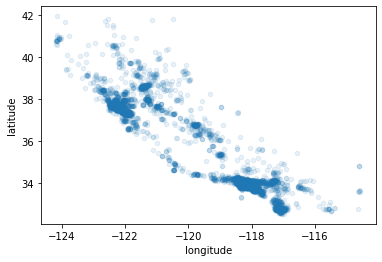

In [34]:
# "alpha=" parametresi ile nokları yoğunlunluğuna göre çizdiriyoruz ve daha anlamlı bir grafik elde ediyoruz 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

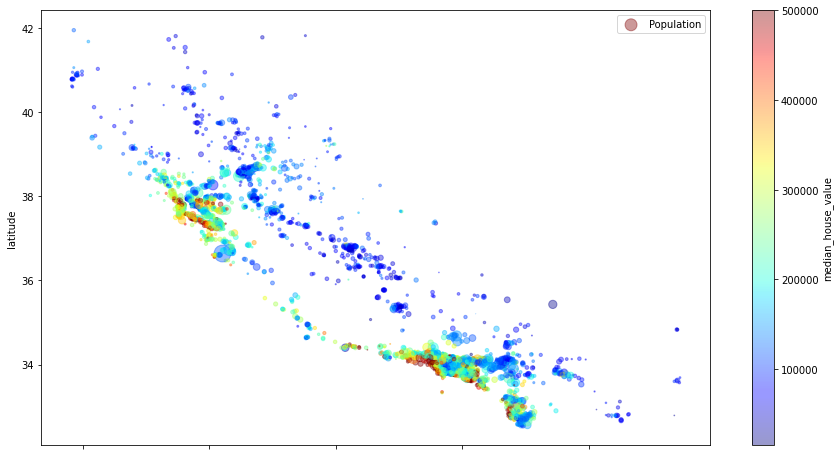

In [61]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100,label="Population", figsize=(15,8), # dairelerin büyüklüğü o vilayetin nufusunu temsil ediyor
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, # daire renkleri ise fiyatını temsil ediyor 
)
plt.legend()
plt.show()

# ev fiyatlarını konum ve nufus yoğunluğu ile doğrudan bağlantılı olduğunu görebiliyoruz 
# bir cluster algoritması kullanarak merkez noktaların tespit edilmesi ve verimize tespit edilen merkezlere olan uzzaklıklarını belirten yeni bir özellik 
# eklenmesi modelimizin daha iyi çalışmasını sağlayabilir.

Looking for Correlations


In [65]:
# pearson methodu ile korelizasyon
corr_matrix = housing.corr()

In [66]:
# korelizasyon yardımı ile veriler arası ilişkileri daha iyi anlayabiliyoruz 
# daha öncede fark ettiğimiz gini median_income ile median_house_value arasında güçlü bir positive korelizasyon gözüküyor 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

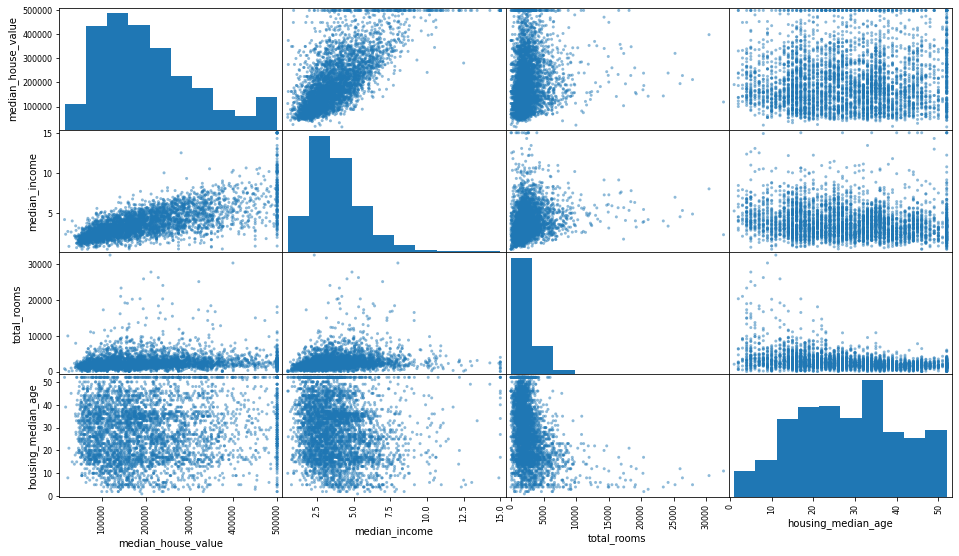

In [70]:
# scatter_matrix fonksiyonu ile korelizasyonları göresel olarak görebiliriz 
# 4 özelliği seçtik ve bunların birbirlerine göre olan korelizasyonlarını scatter grafik şeklinde çizdirdik

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(16, 9))

plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

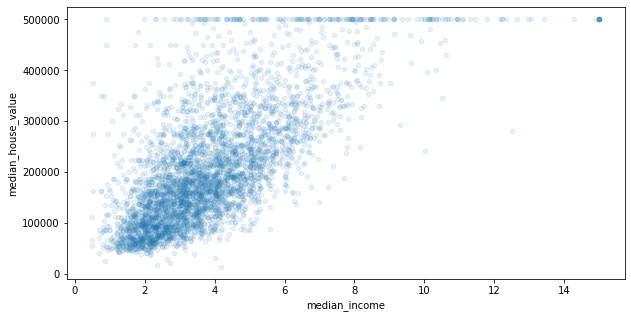

In [77]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1,figsize=(10,5))

# median_house _value ve median_income arasında güzlü bir korelizasyon oluğu gözükmekte
# 500.000 , 450,000 , 280,000 ,220,000 ,180,000 gibi noktalarda yatay fiyat çizgileri oluşmuş
# modelin bu şekildeki verilerden etkilenip bu verilere benzer sonuçlar üretmemesi için bu veriler kaldırılabilir 

# ayrıca bazı veriler  tail-heavy dağılımına sahip yani ortalamayı çok etkileyen büyük değerlere sahipler 
# bu veriler tekrar düzenlemek daha iyi model bulmada yardımcı olabilir

Experimenting with Attribute Combinations

In [78]:
# özellikleri birbiri ile konbinleyerek daha iyi özellikler elde etmeye çalışabiliriz 

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [80]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# room_per_household özelliği total_rooms özelliğinden daha iyi bir korelizasyona sahip oldu

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

Prepare the Data for Machine Learning
Algorithms


In [83]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


Data Cleaning


In [84]:
# housing.dropna(subset=["total_bedrooms"]) # option 1 ,eksik verili satırlardan kurtulunabilir
# housing.drop("total_bedrooms", axis=1) # option , tüm özellik silinebilir
# median = housing["total_bedrooms"].median() # option 3 # eksik verilere ortalama değer atanabilir 
# housing["total_bedrooms"].fillna(median, inplace=True)

In [102]:
from sklearn.impute import SimpleImputer

# imputer adında bir valık oluşturuyoruz
imputer = SimpleImputer(strategy="median")

# numarik olmayan özelliklerin olmadığı yeni bir tablo yapıyoruz
housing_num = housing.drop("ocean_proximity", axis=1)

# imputer.fit ile tüm özelliklerin ortalamasını aldırıyoruz
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [103]:
# alınan ortalamalar imputer.statistics_ de tutulmaktadır
print(imputer.statistics_)

print(housing_num.median().values)


[-118.46     34.22     28.     2159.5     442.     1172.5     416.
    3.5132]
[-118.46     34.22     28.     2159.5     442.     1172.5     416.
    3.5132]


In [105]:
# imputer.transform ile eksik verileri alınan ortalamalar ile dolduruyoruz 
X = imputer.transform(housing_num)

# X dizisini tekrardan tablo haline getiriyoruz
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

# 4079 adet olan total_bedrooms özelliğinin 4128 e tamamlandığını görüyoruz 
display(housing.info())
display(housing_tr.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
dtypes: float64(8)
memory usage: 290.2 KB


None

Handling Text and Categorical Attributes

In [106]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
5241,<1H OCEAN
17352,<1H OCEAN
3505,<1H OCEAN
7777,<1H OCEAN
14155,NEAR OCEAN
7057,<1H OCEAN
33,NEAR BAY
17049,NEAR OCEAN
18164,<1H OCEAN
10444,NEAR OCEAN


In [107]:
from sklearn.preprocessing import OrdinalEncoder

# belirli çeşitte olan yazıları sırası ile farklı sayı gruplarına gönüştürecek
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
# fakat bu şekilde ayırdıktan ML birbirine yakın değerlerin birbiri ile benzer olduklarını düşünecektir 
# örneğin ML e göre 0(<1H OCEAN) ve 1(INLAND) birbirine  0(<1H OCEAN) ve 4(NEAR OCEAN) ten daha benzirdir fakat bizim verimiz için bu doğru değil 

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [4.],
       [0.],
       [4.]])

In [108]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [109]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder ile her defasında yalnızca 1 durumun var olmasını sağlıyoruz ve ML nin doğru değerlendirme yapmasını sağlıyoruz
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [110]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [111]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Custom Transformers


In [155]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # ilgili özelliklerin indexlerini tutuyoruz

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        
        # ev başına düşen oda sayısı ve ev başına düşen populasyonu buluyoruz
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        # duruma göre ev başına düşen yatak odası sayısını buluyoruz 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]  # tüm sonucu bir numpy.narray olarak dönderiyoruz                  
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# bir instance oluşturuyoruz 
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# ve yazdığımız methodu çağırıyoruz
housing_extra_attribs = attr_adder.transform(housing.values)


columns=housing.columns.to_list()
columns.extend(["rooms_per_household","population_per_household"])

# yeni sütünlar eklediğımız veriyi tekrar dataframe haline getiriyoruz 
ex_attribs_housing=pd.DataFrame(data=housing_extra_attribs,columns=columns)
display(ex_attribs_housing)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,6.715625,2.275
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN,7.137809,3.021201
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN,5.283636,2.938182
3,-118.1,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN,5.491694,3.561462
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,6.154723,2.434853
...,...,...,...,...,...,...,...,...,...,...,...
4123,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.817,<1H OCEAN,6.108696,3.279891
4124,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,<1H OCEAN,3.138298,4.503546
4125,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7,<1H OCEAN,4.97486,1.851955
4126,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,<1H OCEAN,5.026699,2.623786


Feature Scaling


In [168]:
# veriler arası aralıkların orantısız olması ,total_rooms "6 -39,320" iken median_income "0 - 15" olması gibi 
# Makine öğrenmesinde bu durum çalışma süresinin ve öğreniminin kötüye gitmesine sebeb olur 
# Bunu için verileri belirli aralıklara getirerek daha uygun bir şekle sokabiliriz 
numaric_data=ex_attribs_housing.drop(columns="ocean_proximity")

# standardization 
from sklearn.preprocessing import StandardScaler

standart_scaler=StandardScaler()
scaled_data=standart_scaler.fit_transform(numaric_data)
scaled_data=pd.DataFrame(data=scaled_data,columns=numaric_data.columns)
display(scaled_data)

# Min-max scaling ,Normalization
from sklearn.preprocessing import MinMaxScaler

minMax_scaler=MinMaxScaler()
minMax_scaled_data=minMax_scaler.fit_transform(numaric_data)
minMax_scaled_data=pd.DataFrame(data=minMax_scaled_data,columns=numaric_data.columns)
display(minMax_scaled_data)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,0.575070,-0.696573,0.032956,1.602218,1.017175,0.614330,1.104803,2.358455,0.731012,-0.436991
1,-0.434801,-0.334668,-0.362981,-0.285055,-0.534073,-0.495927,-0.556024,0.617359,0.962667,0.033956
2,0.545222,-0.635472,0.587268,-0.526772,-0.615486,-0.535191,-0.575650,0.284222,-0.054727,-0.018440
3,0.719338,-0.795274,0.508081,-0.441510,-0.494467,-0.314643,-0.511866,-0.308135,0.059435,0.374929
4,1.231735,-1.331081,0.745643,0.464824,0.141435,0.038734,0.255990,0.267724,0.423243,-0.336103
...,...,...,...,...,...,...,...,...,...,...
4123,1.122291,-0.884575,-0.758918,-0.187856,-0.270031,-0.201863,-0.347501,-0.549633,0.397987,0.197222
4124,0.649691,-0.757673,0.349706,-0.768916,-0.562678,-0.149232,-0.558477,-0.898470,-1.231885,0.969503
4125,-0.086570,-0.546171,1.141580,-0.386942,-0.457061,-0.656325,-0.372033,0.452440,-0.224154,-0.703986
4126,0.813858,-0.926876,0.112144,-0.263313,-0.303036,-0.307125,-0.239559,0.565526,-0.195710,-0.216863


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,0.601871,0.167021,0.549020,0.197548,0.156890,0.076293,0.157704,0.536662,0.162062,0.018923
1,0.390852,0.248936,0.450980,0.061854,0.047486,0.029761,0.046374,0.311030,0.173719,0.030831
2,0.595634,0.180851,0.686275,0.044475,0.041744,0.028115,0.045058,0.267858,0.122524,0.029506
3,0.632017,0.144681,0.666667,0.050605,0.050279,0.037359,0.049334,0.191094,0.128268,0.039453
4,0.739085,0.023404,0.725490,0.115770,0.095127,0.052169,0.100806,0.265720,0.146575,0.021474
...,...,...,...,...,...,...,...,...,...,...
4123,0.716216,0.124468,0.352941,0.068843,0.066108,0.042085,0.060352,0.159798,0.145304,0.034960
4124,0.617464,0.153191,0.627451,0.027065,0.045469,0.044291,0.046210,0.114592,0.063289,0.054488
4125,0.463617,0.201064,0.823529,0.054529,0.052917,0.023038,0.058707,0.289658,0.113998,0.012171
4126,0.651767,0.114894,0.568627,0.063418,0.063780,0.037674,0.067588,0.304313,0.115429,0.024489


Transformation Pipelines

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
 
# veri üzerinde bir çok defa farklı fit ve transform işlemi yapılacaksa bunlari tek seferde Pipeline methodu ile yapmak mümkün
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

# elde ettiğimiz sonuçu ilgili kolon isimlerini vererek tekrar bir data frame haline getiriyoruz 
columns=list(housing_num.columns)
columns.extend(["rooms_per_household","population_per_household","bedrooms_per_room"])
data=pd.DataFrame(data=housing_num_tr,columns=columns)
display(data.head(10))
display(data.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,0.575070,-0.696573,0.032956,1.602218,1.025754,0.614330,1.104803,2.358455,0.731012,-0.436991,-0.884249
1,-0.434801,-0.334668,-0.362981,-0.285055,-0.534263,-0.495927,-0.556024,0.617359,0.962667,0.033956,-0.961419
2,0.545222,-0.635472,0.587268,-0.526772,-0.616136,-0.535191,-0.575650,0.284222,-0.054727,-0.018440,-0.438265
3,0.719338,-0.795274,0.508081,-0.441510,-0.494433,-0.314643,-0.511866,-0.308135,0.059435,0.374929,-0.271470
4,1.231735,-1.331081,0.745643,0.464824,0.145064,0.038734,0.255990,0.267724,0.423243,-0.336103,-0.799156
5,0.749186,-0.785874,0.508081,-0.376711,-0.357240,0.047088,-0.352407,0.168635,-0.247840,0.722401,0.003572
6,-1.355128,1.047151,1.616705,-0.440657,-0.403708,-0.580303,-0.443176,-1.317020,-0.193682,-0.426392,0.107819
7,-1.350153,0.873248,-0.204606,1.013910,0.446003,0.457274,0.535657,1.676481,0.865193,-0.142408,-1.022691
8,-1.235734,0.826248,-0.996480,0.003557,0.563281,-0.066527,0.523391,0.329988,-0.907056,-0.677766,1.291797
9,0.963100,-1.020877,-0.362981,-0.164409,-0.330686,-0.499268,-0.320515,0.073270,0.380331,-0.455683,-0.632582


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
count,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03
mean,-5.060551e-16,3.012233e-16,8.606380e-17,-1.721276e-18,-1.127436e-16,-4.152578e-17,-6.153562e-17,4.647445e-17,-9.036699e-17,2.366755e-17,-4.436589e-16
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00
min,-2.305303e+00,-1.434482e+00,-2.184292e+00,-1.145347e+00,-1.211377e+00,-1.206024e+00,-1.247831e+00,-1.782721e+00,-2.489596e+00,-1.185326e+00,-2.541286e+00
25%,-1.111366e+00,-7.905738e-01,-8.381054e-01,-5.178195e-01,-5.436672e-01,-5.370706e-01,-5.560242e-01,-6.956202e-01,-5.207771e-01,-3.425237e-01,-5.960668e-01
50%,5.402470e-01,-6.495719e-01,-4.623104e-02,-2.255843e-01,-2.355362e-01,-2.306847e-01,-2.297465e-01,-1.791374e-01,-9.057339e-02,-9.157043e-02,-1.656999e-01
75%,7.790344e-01,9.813499e-01,6.664559e-01,2.057343e-01,2.269370e-01,2.553139e-01,2.541503e-01,4.733144e-01,3.557482e-01,2.014143e-01,4.008030e-01
max,2.480394e+00,2.983577e+00,1.854267e+00,1.276300e+01,1.304784e+01,2.265406e+01,1.367017e+01,5.933828e+00,1.738304e+01,3.836148e+01,1.486126e+01


In [192]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Yapılacak fit_transform işlemlerinde farklı kolonlara çoklu veya tek işlem uygulanmasına olanak sağlıyor 
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)

# elde ettiğimiz sonuçu ilgili kolon isimlerini vererek tekrar bir data frame haline getiriyoruz 
columns=list(housing_num.columns)
columns.extend(["rooms_per_household","population_per_household","bedrooms_per_room",'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
data=pd.DataFrame(data=housing_prepared,columns=columns)
display(data.head(10))
display(data.describe())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.575070,-0.696573,0.032956,1.602218,1.025754,0.614330,1.104803,2.358455,0.731012,-0.436991,-0.884249,1.0,0.0,0.0,0.0,0.0
1,-0.434801,-0.334668,-0.362981,-0.285055,-0.534263,-0.495927,-0.556024,0.617359,0.962667,0.033956,-0.961419,1.0,0.0,0.0,0.0,0.0
2,0.545222,-0.635472,0.587268,-0.526772,-0.616136,-0.535191,-0.575650,0.284222,-0.054727,-0.018440,-0.438265,1.0,0.0,0.0,0.0,0.0
3,0.719338,-0.795274,0.508081,-0.441510,-0.494433,-0.314643,-0.511866,-0.308135,0.059435,0.374929,-0.271470,1.0,0.0,0.0,0.0,0.0
4,1.231735,-1.331081,0.745643,0.464824,0.145064,0.038734,0.255990,0.267724,0.423243,-0.336103,-0.799156,0.0,0.0,0.0,0.0,1.0
5,0.749186,-0.785874,0.508081,-0.376711,-0.357240,0.047088,-0.352407,0.168635,-0.247840,0.722401,0.003572,1.0,0.0,0.0,0.0,0.0
6,-1.355128,1.047151,1.616705,-0.440657,-0.403708,-0.580303,-0.443176,-1.317020,-0.193682,-0.426392,0.107819,0.0,0.0,0.0,1.0,0.0
7,-1.350153,0.873248,-0.204606,1.013910,0.446003,0.457274,0.535657,1.676481,0.865193,-0.142408,-1.022691,0.0,0.0,0.0,0.0,1.0
8,-1.235734,0.826248,-0.996480,0.003557,0.563281,-0.066527,0.523391,0.329988,-0.907056,-0.677766,1.291797,1.0,0.0,0.0,0.0,0.0
9,0.963100,-1.020877,-0.362981,-0.164409,-0.330686,-0.499268,-0.320515,0.073270,0.380331,-0.455683,-0.632582,0.0,0.0,0.0,0.0,1.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4.128000e+03,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-5.060551e-16,3.012233e-16,8.606380e-17,-1.721276e-18,-1.127436e-16,-4.152578e-17,-6.153562e-17,4.647445e-17,-9.036699e-17,2.366755e-17,-4.436589e-16,0.450339,0.312258,0.000727,0.107316,0.129360
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,0.497588,0.463470,0.026952,0.309552,0.335639
min,-2.305303e+00,-1.434482e+00,-2.184292e+00,-1.145347e+00,-1.211377e+00,-1.206024e+00,-1.247831e+00,-1.782721e+00,-2.489596e+00,-1.185326e+00,-2.541286e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.111366e+00,-7.905738e-01,-8.381054e-01,-5.178195e-01,-5.436672e-01,-5.370706e-01,-5.560242e-01,-6.956202e-01,-5.207771e-01,-3.425237e-01,-5.960668e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.402470e-01,-6.495719e-01,-4.623104e-02,-2.255843e-01,-2.355362e-01,-2.306847e-01,-2.297465e-01,-1.791374e-01,-9.057339e-02,-9.157043e-02,-1.656999e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.790344e-01,9.813499e-01,6.664559e-01,2.057343e-01,2.269370e-01,2.553139e-01,2.541503e-01,4.733144e-01,3.557482e-01,2.014143e-01,4.008030e-01,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.480394e+00,2.983577e+00,1.854267e+00,1.276300e+01,1.304784e+01,2.265406e+01,1.367017e+01,5.933828e+00,1.738304e+01,3.836148e+01,1.486126e+01,1.000000,1.000000,1.000000,1.000000,1.000000
